In [2]:
# data preparation
import os
import pandas as pd

url = "https://raw.githubusercontent.com/keeley02/ai-project/main/test(in).csv"
df = pd.read_csv(url)

print(df.head())
from textblob import TextBlob
from transformers import pipeline
# Step
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
df = pd.DataFrame(df)
print(df.head())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  


In [4]:
#Task 1: Sentiment Labeling
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertForSequenceClassification

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load model and tokenizer
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model.to(device)  # Move model to device

# Function to determine sentiment using PyTorch with confidence and thresholding
def get_advanced_sentiment_with_neutral_threshold(text):
    inputs = tokenizer.encode_plus(
        text, return_tensors='pt', max_length=512, truncation=True, padding='max_length'
    )
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Ensure inputs are on the correct device
    output = model(**inputs)
    logits = output.logits
    probabilities = F.softmax(logits, dim=1)  # Apply softmax to get probabilities
    max_prob, predicted_class = torch.max(probabilities, dim=1)  # Get max probability and predicted class

    # Convert to human-readable sentiment with confidence threshold
    label_map = {0: 'Negative', 1: 'Negative', 2: 'Neutral', 3: 'Positive', 4: 'Positive'}

    # Use a confidence threshold
    if max_prob.item() < 0.5:
        sentiment = 'Neutral'
    else:
        sentiment = label_map[predicted_class.item()]

    return sentiment

# Apply to DataFrame
df['Sentiment'] = df['body'].apply(get_advanced_sentiment_with_neutral_threshold)
print(df.head())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from Sentiment  
0     sally.beck@enron.com   Neutral  
1      eric.bass@enron.com   Neutral  
2     sally.beck@enron.com   Neutral  
3  johnny.palmer@enron.com   Neutral  
4  lydia.delgado@enron.com   Neutral  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   Sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB
None
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   


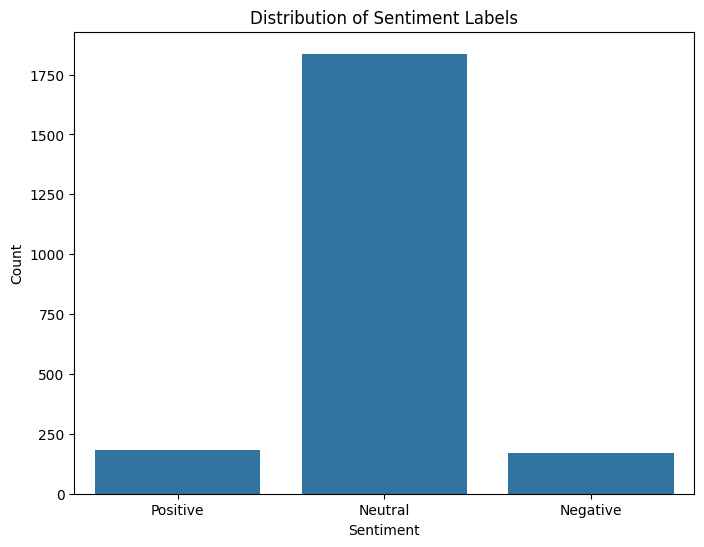

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

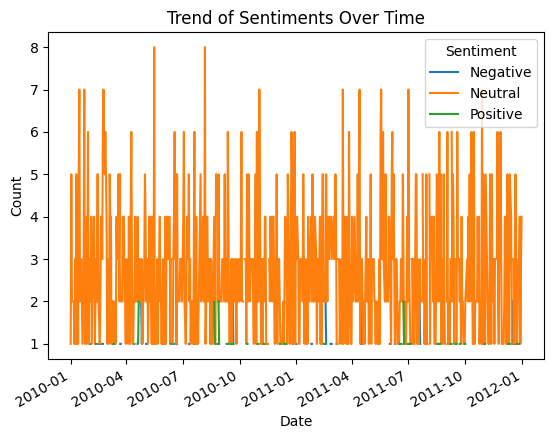

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

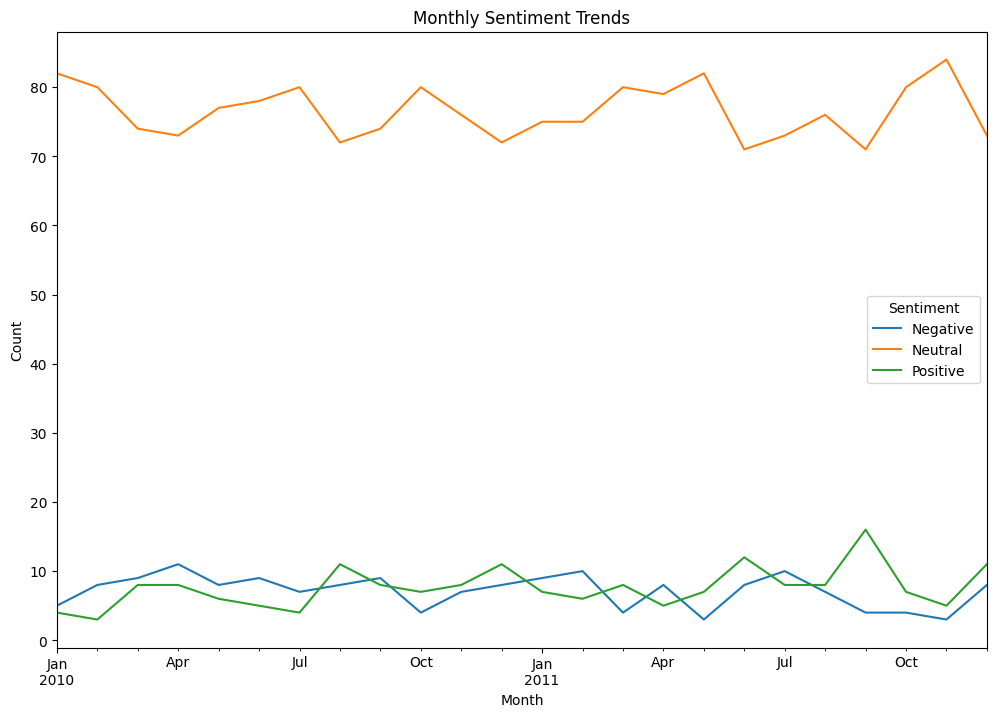

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

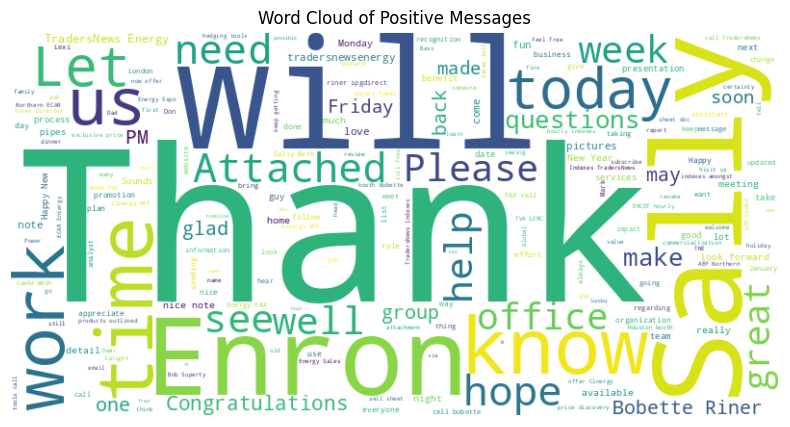

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

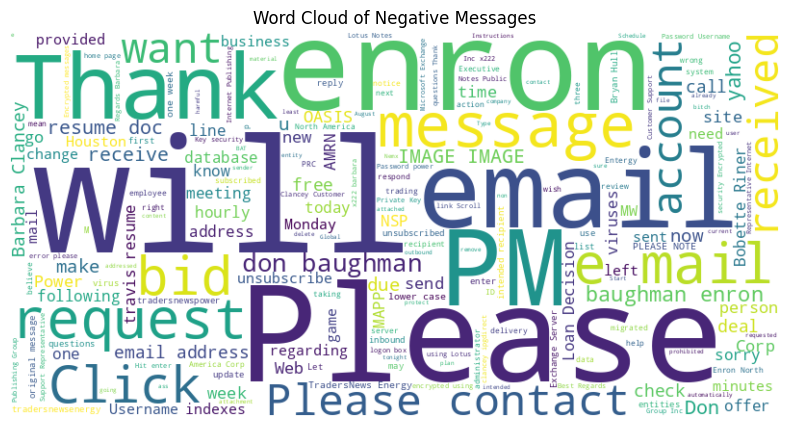

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

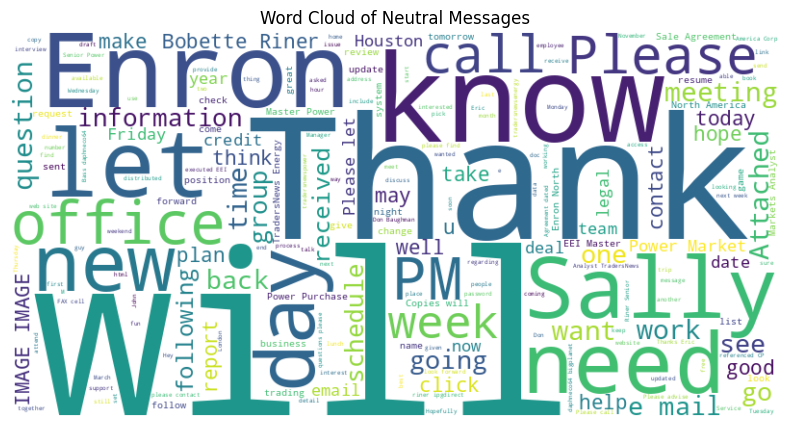

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [5]:
#Task 2: Exploratory Data Analysis (EDA)
print(df.info())  # Check data types and non-null counts
print(df.head())  # Get a peek at the first few records
print(df.describe())  # Get basic statistics for numerical columns
missing_values = df.isnull().sum()
print("Number of missing values in each column:\n", missing_values)
unique_names = df['Sentiment'].nunique()
print(f"Number of unique labels in 'name': {unique_names}")

# Calculate number of unique labels in each column
unique_values = df.nunique()
print("\nNumber of different labels in each column:\n", unique_values)
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
plt.savefig('Distribution_sentiment.png', format='png', dpi=300, bbox_inches='tight')
files.download('Distribution_sentiment.png')

df['date'] = pd.to_datetime(df['date'])
# Example of trends over time by sentiment (assuming 'date' and 'Sentiment' columns)
plt.figure(figsize=(12, 8))
df.groupby(['date', 'Sentiment']).size().unstack().plot(kind='line', stacked=False)
plt.title('Trend of Sentiments Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('trends_over_time.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
files.download('trends_over_time.png')

# Optional: If you have a monthly or weekly aggregation instead
df['month'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby(['month', 'Sentiment']).size().unstack().fillna(0)
monthly_trends.plot(kind='line', figsize=(12, 8))
plt.title('Monthly Sentiment Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('Monthly_Sentiment.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
files.download('Monthly_Sentiment.png')

from wordcloud import WordCloud

# Generate word cloud for the positive sentiments
positive_words = ' '.join(df[df['Sentiment'] == 'Positive']['body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Messages')
plt.show()
plt.savefig('Wordcloud_positive.png')
files.download('Wordcloud_positive.png')

negative_words = ' '.join(df[df['Sentiment'] == 'Negative']['body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Messages')
plt.show()
plt.savefig('Wordcloud_negative.png')
files.download('Wordcloud_negative.png')
neutral_words = ' '.join(df[df['Sentiment'] == 'Neutral']['body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Messages')
plt.show()
plt.savefig('Wordcloud_neutral.png')
files.download('Wordcloud_neutral.png')

In [6]:
#Task 3: Employee Score Calculation
df['date'] = pd.to_datetime(df['date'])
# Map sentiment labels to scores
score_map = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}

# Create a new column 'Score' in the DataFrame
df['Score'] = df['Sentiment'].map(score_map)
# Extract month and year for grouping
df['Month-Year'] = df['date'].dt.to_period('M')

# Group data by 'from' (EmployeeID) and Month-Year, then aggregate scores
monthly_scores = df.groupby(['from', 'Month-Year'])['Score'].sum().reset_index()

# Rename columns for clarity
monthly_scores.rename(columns={'from': 'EmployeeID', 'Score': 'Monthly_Sentiment_Score'}, inplace=True)
# Display the results
print(monthly_scores)

# Export the results
monthly_scores


                      EmployeeID Month-Year  Monthly_Sentiment_Score
0    bobette.riner@ipgdirect.com    2010-01                        0
1    bobette.riner@ipgdirect.com    2010-02                        0
2    bobette.riner@ipgdirect.com    2010-03                        0
3    bobette.riner@ipgdirect.com    2010-04                       -1
4    bobette.riner@ipgdirect.com    2010-05                        1
..                           ...        ...                      ...
235         sally.beck@enron.com    2011-08                       -2
236         sally.beck@enron.com    2011-09                        0
237         sally.beck@enron.com    2011-10                        0
238         sally.beck@enron.com    2011-11                        1
239         sally.beck@enron.com    2011-12                        1

[240 rows x 3 columns]


,EmployeeID,Month-Year,Monthly_Sentiment_Score
0,bobette.riner@ipgdirect.com,2010-01,0
1,bobette.riner@ipgdirect.com,2010-02,0
2,bobette.riner@ipgdirect.com,2010-03,0
3,bobette.riner@ipgdirect.com,2010-04,-1
4,bobette.riner@ipgdirect.com,2010-05,1
...,...,...,...
235,sally.beck@enron.com,2011-08,-2
236,sally.beck@enron.com,2011-09,0
237,sally.beck@enron.com,2011-10,0
238,sally.beck@enron.com,2011-11,1


                    EmployeeID  Aggregate_Sentiment_Score
0  bobette.riner@ipgdirect.com                          0
1       don.baughman@enron.com                         -4
2          eric.bass@enron.com                          8
3        john.arnold@enron.com                         -5
4      johnny.palmer@enron.com                         10
5      kayne.coulter@enron.com                         -5
6      lydia.delgado@enron.com                          6
7     patti.thompson@enron.com                         -7
8      rhonda.denton@enron.com                          5
9         sally.beck@enron.com                          4
                EmployeeID  Aggregate_Sentiment_Score
4  johnny.palmer@enron.com                         10
2      eric.bass@enron.com                          8
6  lydia.delgado@enron.com                          6
                 EmployeeID  Aggregate_Sentiment_Score
3     john.arnold@enron.com                         -5
5   kayne.coulter@enron.com         

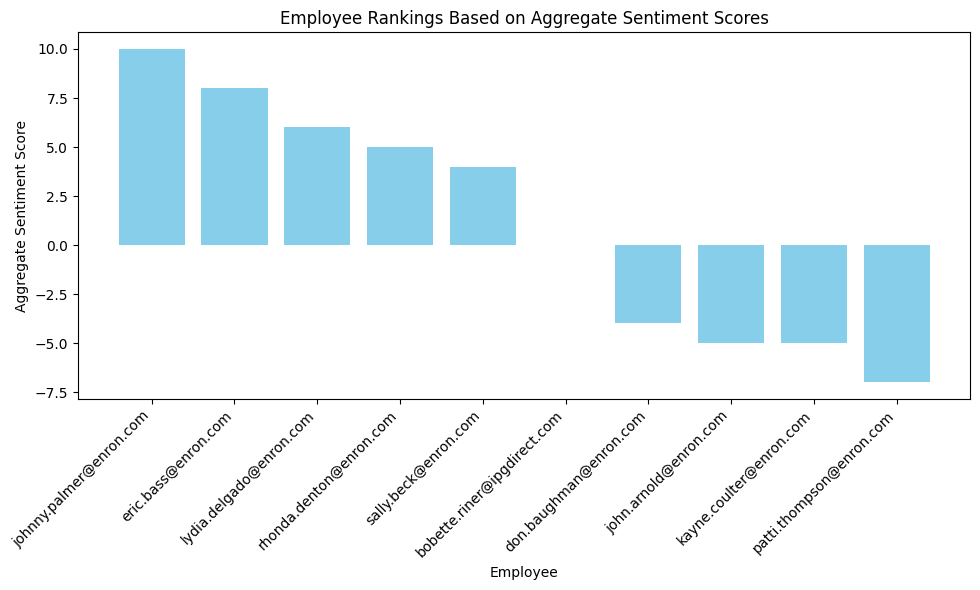

In [10]:
#Task 4: Employee Ranking
# Sum scores for each employee
import pandas as pd
import matplotlib.pyplot as plt
aggregate_scores = monthly_scores.groupby('EmployeeID')['Monthly_Sentiment_Score'].sum().reset_index()

# Rename the column for clarity
aggregate_scores.rename(columns={'Monthly_Sentiment_Score': 'Aggregate_Sentiment_Score'}, inplace=True)

# Display the results
print(aggregate_scores)

sorted_aggregate_scores = aggregate_scores.sort_values(by=['Aggregate_Sentiment_Score', 'EmployeeID'], ascending=[False, True])

print(sorted_aggregate_scores.head(3))
print(sorted_aggregate_scores.tail(3))
# Display the sorted aggregate scores
print(sorted_aggregate_scores)

# Plotting the aggregated scores
plt.figure(figsize=(10, 6))
plt.bar(sorted_aggregate_scores['EmployeeID'], sorted_aggregate_scores['Aggregate_Sentiment_Score'], color='skyblue')
plt.title('Employee Rankings Based on Aggregate Sentiment Scores')
plt.xlabel('Employee')
plt.ylabel('Aggregate Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-12-5da655e687e0>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('from', as_index=False).apply(compute_flight_risk)


Employees at risk of leaving: ['eric.bass@enron.com' 'john.arnold@enron.com' 'patti.thompson@enron.com']


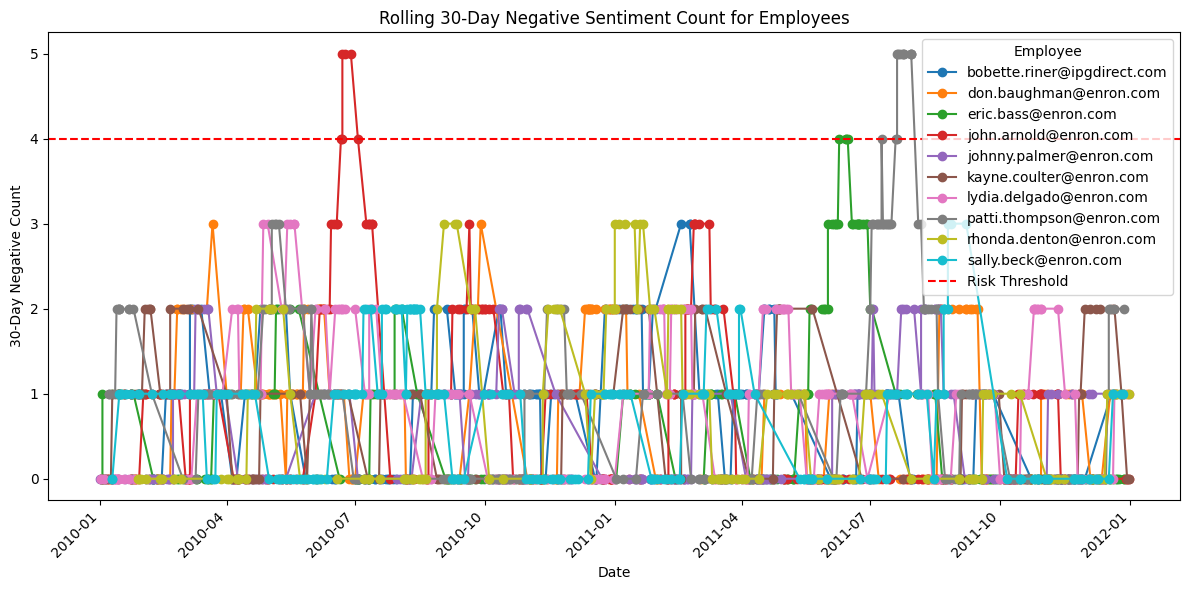

In [12]:
#Task 5: Flight Risk Identification

import pandas as pd

# Convert 'date' column to datetime format
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Flag negative sentiments
df['NegativeFlag'] = df['Sentiment'].apply(lambda x: 1 if x == 'Negative' else 0)

# Sort by employee and date
df.sort_values(['from', 'date'], inplace=True)

# Function to calculate rolling negative count
def compute_flight_risk(group):
    group = group.set_index('date')
    group['NegativeRollingCount'] = group['NegativeFlag'].rolling('30D').sum()
    return group.reset_index()

# Group by employee and apply the rolling calculation
df = df.groupby('from', as_index=False).apply(compute_flight_risk)

# Flag employees at risk, note: must be correct series compared due to NaN handling
df['FlightRisk'] = df['NegativeRollingCount'] >= 4

# Extract employees at risk
at_risk_employees = df[df['FlightRisk']]['from'].unique()

# Display results
print(f"Employees at risk of leaving: {at_risk_employees}")

# Visual representation
plt.figure(figsize=(12, 6))

# Plot negative sentiment trends
for employee, group in df.groupby('from'):
    plt.plot(group['date'], group['NegativeRollingCount'], marker='o', label=employee)

plt.axhline(4, color='red', linestyle='--', label='Risk Threshold')
plt.title('Rolling 30-Day Negative Sentiment Count for Employees')
plt.xlabel('Date')
plt.ylabel('30-Day Negative Count')
plt.legend(title='Employee')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

          date                                            Subject  \
0 0 2010-01-23  MANUAL WIRE & SAME DAY PAYMENT AUTHORIZATION S...   
  1 2010-01-25                     Central Illinois Light Company   
  2 2010-02-03               Important FastWeb Scholarship Alert!   
  3 2010-02-05              Re: Global Risk Management Operations   
  4 2010-02-08                                       (No Subject)   

                                                  body  \
0 0  Attached is the new list of authorized signers...   
  1  We have received the executed EEI Master Power...   
  2  Dear Stacy:\n\nA NEW SCHOLARSHIP IS WAITING FO...   
  3  Hi:\n\nI am the newly hired Safety and Environ...   
  4  To whom it may concern:\n\nIn previous years E...   

                            from Sentiment  month  Score Month-Year  \
0 0  bobette.riner@ipgdirect.com   Neutral      1      0    2010-01   
  1  bobette.riner@ipgdirect.com   Neutral      1      0    2010-01   
  2  bobette.riner@ipgd

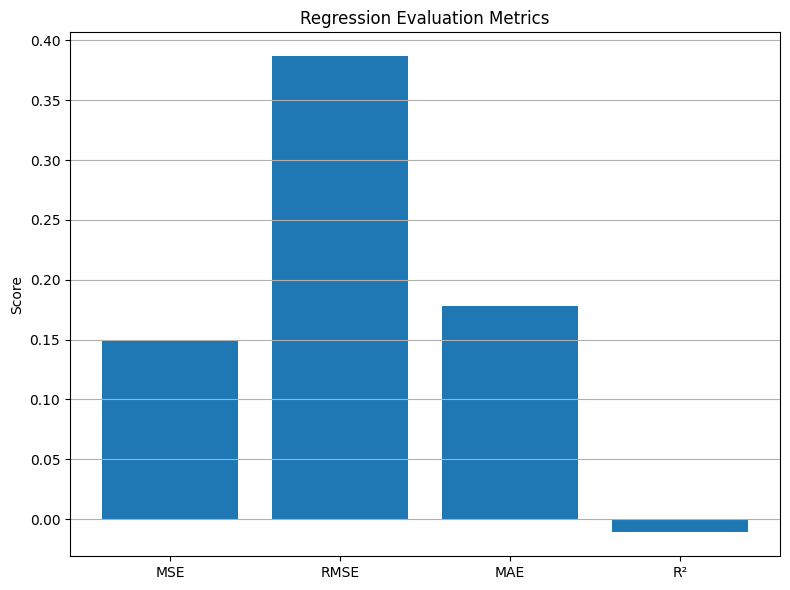

In [36]:
#Task 6: Predictive Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from textblob import TextBlob

from textblob import TextBlob
# Feature Engineering: Extract time-based features
df['month'] = df['date'].dt.month

# Feature Engineering: Extract message-based features
df['please_count'] = df['body'].str.lower().apply(lambda x: x.split().count('please'))

print(df.head())
# Encode sentiment scores if necessary
# Use 'Score' column directly if categorical; modify as needed

# Split data into features and target variable
X = df[['month', 'please_count']]
y = df['Score']  # or use a numerical sentiment score

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred) #r-squared
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error


print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

# Interpret the coefficients
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print("\nFeature Importance:")
print(feature_importance)

# Refit the model using statsmodels for p-values and other statistics
X = sm.add_constant(X)  # Add a constant for intercept
sm_model = sm.OLS(y, X).fit()

# Extract and print p-values
print("\nP-values from statsmodels:")
print(sm_model.pvalues)

# Optionally, print the full statsmodels summary
print("\nModel Summary:")
print(sm_model.summary())

# Discuss findings
print("\nDiscussion:")
print("Analysis shows the significance of time-based features and message attributes in predicting sentiment scores.")
print("Higher absolute coefficients suggest greater influence on predicted scores.")
#Discuss findings
print("\nDiscussion:")
print("Analysis shows the significance of time-based features and message attributes in predicting sentiment scores.")
print("Higher absolute coefficients suggest greater influence on predicted scores.")

# Visualize metric comparison
metrics = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values())
plt.title('Regression Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()